# E1 - Moment and Cumulant Reconstructions

## 1. Introduction
#### Theory background
SOFI *Moments* and *cumulants* can be calculated in different ways. *Moments* can be calculated directly from the time series [1,2], it can also be reconstructed from the *cumulants* as described in [2,3]. Meanwhile, the *cumulant* can be calcualted as a polynomial of all the equal and lower orders of *moments* in [1,2], it can also be calculated using the following recursive relation 

$Cum_n=G_n - \sum_{i=1}^{n-1}{C_{n-1}^{i} \cdot Cum_{n-i} \cdot G_i}$,

where $Cum_n$ represents the $n^{th}$ order *cumulant*, $G_n$ represents the $n^{th}$ order *moment*, and $C_{N}^{M}$ means the number of combinations of "N choose M".

Note that although the different ways to calculate the *comulatns* and the *moments* are mathematically equivalent, we often find numerical differences in the results when analyzing the datasetes from both experiments and simulations.

#### What's included in this notebook
Two different ways are implemented in **pysofi** to calculate the *moments* (to directly compute from the time series, or to reconstruct from cumulants), and the *cumulant* calculation is implemented using the recursive relation. This notebook demonstrate two options to use the package to calculate the *moments* and the *cumulants*: One option (section 3) is to adopt the data processing workflow implemented in the PysofiData class. This option is recommended when the use case can directly benefit from the traditional SOFI analysis. The second option (section 4) is to import the relevant function module (reconstruction.py), and directly use the functions to calculate the *moments* and the *cumulants*. The second option is useful when a standalone inspection and implementation of such calculations are required, for example in the development of new methods. 


#### Relevant dataset
The datafiles used in the examples (Jupyter Notebooks) are included in the *exampledata* folder in the **pysofi** repository. In this notebook, we use an experimental dataset from our previous work [1]. The sample is a Hela cell transfected with Dronpa-C12 (fluorescent protein) fused to β-Actin. Details of the experimental procedure are availble in the relevant pulbication [1]. we only used 200 frames in this demonstration (Block1.tiff). The input data can be replaced with any datasets with the same format (tiff image stacks), which can either be simulations or experimental acquisitions. 


## 2. Import all the tools
Before we begin, let's first import all the relevant packages and modules.

In [1]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from functions import visualization as v
from functions import pysofi

Loading BokehJS ...

## 3. Use <code>PysofiData</code> class to calculate *moments* and *cumulants*

Here we demonstrate the analysis using the workflow implemented in the <code>PysofiData</code> class.

#### 3.1. Load the data
First, we load the data into the <code>PysofiData</code> class.

In [2]:
# load data into PysofiData object
filepath = '../sampledata' # define the path to the datafile.
filename = 'Block1.tif' # define the filename of the TIFF stack to be analyzed.
d = pysofi.PysofiData(filepath, filename) # load the data into the PysofiData class.

Second, we calculate the time average image of the dataset

In [3]:
# Calculate the time average image using the .average_image() method in PysofiData class. 
mean_im = d.average_image()

Sometimes we would want to take a look at the average image, and compare it to a single frame from the movie stack.

We can take out a single image from the image stack using the <code>.get_frame(I)</code> method, where **I** is the index of the frame.


In [4]:
frame_im = d.get_frame(20) # here we are taking out the $20^{th}$ frame

Then we can display the two images next to each other to have a quick inspection:

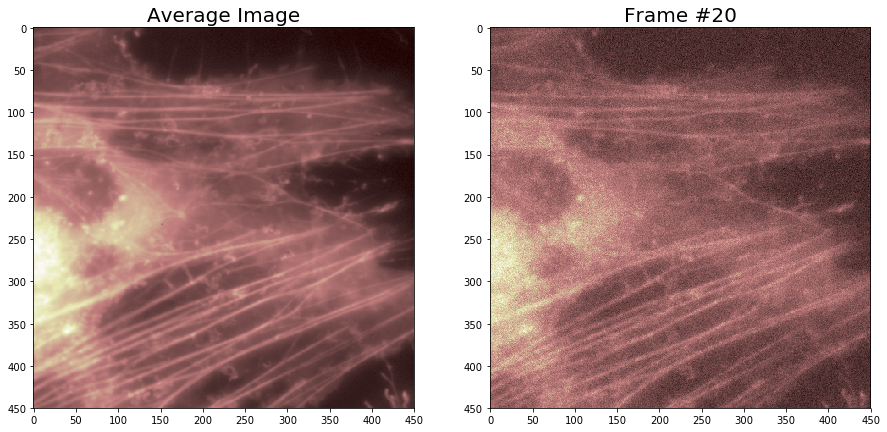

In [5]:
# Display the time average image, as well as the 20th frame.
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].set_title('Average Image', fontsize=20)
axs[0].imshow(mean_im, cmap='pink')
axs[1].set_title('Frame #20', fontsize=20)
axs[1].imshow(frame_im, cmap='pink')
plt.show()

#### 3.2. Calculate the *moments*
Now we can proceed to calculate the *moments* with **pysofi**. Two options are implemented:

(1) Calculate *moment* of a specific order using the <code>PysofData.moment_image()</code> method.

(2) Calculate a set of *moments* of different orders starting from the lowest order up to a specified highest order using the <code>PysofData.calc_moments_set()</code> method.




To use the <code>PysofData.moment_image()</code> method, we can pass a single number as the *moment* order and calculate the moments with the default setting: calculate for the full stack of images in the datafile, without Fourier Interpolation:

In [6]:
# This is to calcualte the 6th order moment for 
# the full image stack without Fourier Interpolation
m_im = d.moment_image(order=6) 

Calculating the 6-order moment ...
[==============================] 100.0%



We can also specify the first and the last frame indexes of the image stack to be used for the calculation of the *moment*, and specify whether we would like to apply Fourier interpolation in the calculations or not. For example, we can use the following settings:

+ <code>order=4</code>: To specify the order to be 4.
+ <code>mvlength=[0,200]</code>: To set the range of frame indexes to be used in the calculations.
+ <code>finterp=False, interp_num=1</code>: To choose not to use the [Fourier interpolation](https://github.com/xiyuyi-at-LLNL/pysofi/blob/master/Notebooks/E5_FourierInterpolation.ipynb) in this calculation. <code>finterp</code> is a boolean to set wehther Fourier interpolation would be used or not, and <code>interp_num</code> sets the number of extra piexels to be interpolated in between of each pair of original pixels.  

The following script performs the calculation using such settings:

In [7]:
m_im_finterp = d.moment_image(order=4, mvlength=[0,200], finterp=False, interp_num=1)

Calculating the 4-order moment ...
[==============================] 100.0%



Now let's have a quick inspection on the *moment* images calcualted above:

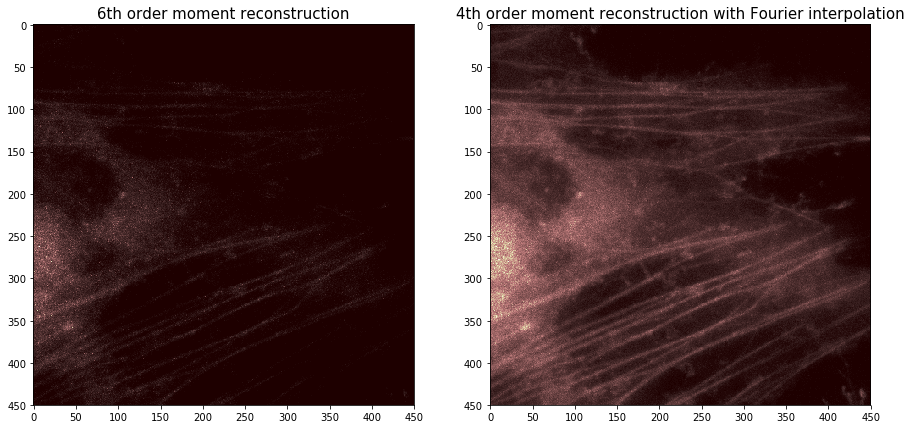

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7)) 
axs[0].set_title('6th order moment reconstruction', fontsize=15)
axs[0].imshow(m_im, cmap='pink') # display the moments calcualted with the default settings
axs[1].set_title('4th order moment reconstruction with Fourier interpolation', fontsize=15)
axs[1].imshow(m_im_finterp, cmap='pink') # display the moments calculated with the specified settings.
plt.show()

The other option to calculate moments in the <code>PysofiData</code> class is to use the <code>PysofiData.calc_moments_set()</code> method, which can calcualate a series of moments starting from the lowest order ($2^{nd}$ order) to to a highest order defined as an input parameters.
For example, we can use <code>d.calc_moments_set(highest_order=4)</code> to calculate moments of order 2, 3 and 4. 

The result images are returned as a dictionary with the order numbers as 'keys', and with images as <code>np.ndarray</code> 2D arrays. The dictionary is also saved in the <code>PysofiData</code> class as an attribute: <code>PysofiData.moments_set</code>. 

The following script perfroms such calculations:

In [9]:
m_set = d.calc_moments_set(highest_order=4)

Calculating the 1st-order moment...
[==============================] 100.0%

Calculating the 2nd-order moment...
[==============================] 100.0%

Calculating the 3rd-order moment...
[==============================] 100.0%

Calculating the 4th-order moment...
[==============================] 100.0%



We can check the orders of moments that have been calculated by checking the keys of the dictionary:

In [10]:
print(m_set.keys())

dict_keys([1, 2, 3, 4])


Now we can inspect the result for the *moments* calculation:

Text(0.5,1,'4th order moment (d.moments_set[4])')

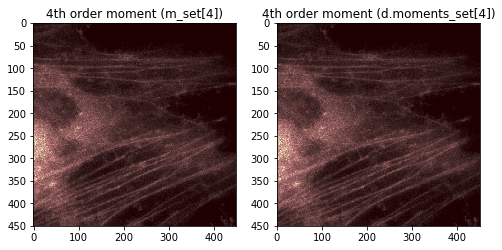

In [11]:
plt.figure(figsize = (8,4))

# the result can be referenced through the returned variaable m_set
plt.subplot(1,2,1)
plt.imshow(m_set[4], cmap='pink') 
plt.title('4th order moment (m_set[4])')

# the result can also be referenced through the attribute of the PysofiData object d: d.moments_set
plt.subplot(1,2,2)
plt.imshow(d.moments_set[4], cmap='pink') 
plt.title('4th order moment (d.moments_set[4])')

#### 3.3. Calculate the *cumulants*
In **pysofi**, we implement the *cumulant* calculations using the recursive relation, which means that if the desired order of cumulant is $n$, we always have to calculate all the cumulants with orders lower than $n$.  Therefore we do not have the option to calcualte a specific order of cumulants without cancluating the other orders. The method <code>PysofiData.cumulants_images()</code> calculates all *cumulant* images from the lowest order ($2^{nd}$ order) up to the order defined by the <code>highest_order</code> parameter.

Note that the calculation of *cumulants* requires the relevant *moment* images, but if the user did not perform the calculations of *moments* described above (section 3.1), **pysofi** would detect it and perform thoes calculations as needed. Additionally, the highest cumulant order does not need to match the highest moment order calculated previously, **pysofi** can identify and calcualte the extra order of reconstructions as needed in the *cumulant* calculation process.

For example, in this demonstrations, we've only calculate *moments* up to $4^{th}$ order so far, but we can tell the <code>PysofiData</code> object <code>d</code> to compute the $5^{th}$ order cumulant as shown below:

In [12]:
k_set = d.cumulants_images(highest_order=5)

Calculating the 1st-order moment...
[==============================] 100.0%

Calculating the 2nd-order moment...
[==============================] 100.0%

Calculating the 3rd-order moment...
[==============================] 100.0%

Calculating the 4th-order moment...
[==============================] 100.0%

Calculating the 5th-order moment...
[==============================] 100.0%



Similar to *moments*, the resultant *cumulant* images are returned as a dictionary with order numbers as 'keys', and with images as <code>np.ndarray</code> 2D arrays. The dictionary is also saved in the <code>PysofiData</code> class as an attribute: <code>PysofiData.cumulants_set</code>. 

We can print out the keys and check orders of cumulants that have been calculated:

In [13]:
print(k_set.keys())

dict_keys([1, 2, 3, 4, 5])


Now we can inspect the result for the *cumulants* calculation:

dict_keys([1, 2, 3, 4, 5])


Text(0.5,1,'2nd order cumulant (d.cumulants_set[2])')

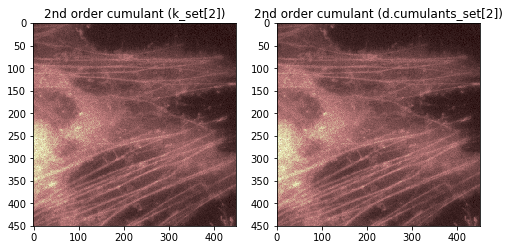

In [14]:
print(k_set.keys()) 
plt.figure(figsize = (8,4))

# the result can be referenced through the returned variaable m_set
plt.subplot(1,2,1)
plt.imshow(k_set[2], cmap='pink') 
plt.title('2nd order cumulant (k_set[2])')

# the result can also be referenced through the attribute of the PysofiData object d: d.moments_set
plt.subplot(1,2,2)
plt.imshow(d.cumulants_set[2], cmap='pink') 
plt.title('2nd order cumulant (d.cumulants_set[2])')

Note that the $2^{nd}$ order cumulants are equivalent to the $2^{nd}$ order moments. High-order (order>2) cumulant of each pixel can be either positive or negative values because of the heterogeneity of the blinking statistics of emitters and generate [cusp artifacts](https://www.osapublishing.org/boe/fulltext.cfm?uri=boe-11-2-554&id=425585), which hinders the resolution enhancement. The mixed negative and positive pixels can be seen in the 5th order cumulant:


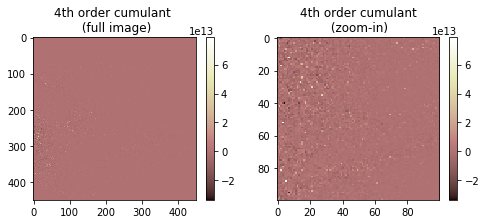

In [15]:
# the result can also be referenced through the attribute of the PysofiData object d: d.moments_set
plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
plt.imshow(d.cumulants_set[5], cmap='pink') 
plt.title('4th order cumulant \n (full image)')
plt.colorbar(shrink=0.5)

plt.subplot(1,2,2)
plt.imshow(d.cumulants_set[5][250:350,0:100], cmap='pink') 
plt.title('4th order cumulant\n (zoom-in)')
plt.colorbar(shrink=0.5)


## 4. Use <code>reconstruction</code> module to calculate *moments* and *cumulants*
We can directly important the function module <code>reconstruction.py</code> to perform the relevant calculations.

This way is useful when one would like to perfrom the analysis as a standaloen process, which provides the flexibility for dissemination of the package. The following are the functions for the *moments* and *cumulants* calculations:

+ <code>average_image</code>: Calculate the time average image of the movie sequence. 
+ <code>calc_moment_im</code>: Calcualte the *moment* of a specific order.
+ <code>calc_moments</code>: Calculat a sreies of *moments* up to a user-defined highest order.
+ <code>calc_cumulants_from_moments</code>: Calculate all *cumulants* up to a user-defined highest order.

Below are the demonstration scripts.

First, we can directly import the function module and define the data path:

In [16]:
from functions import reconstruction as rec
filepath = '../sampledata'
filename = 'Block1.tif'

We can calculate the corresponding quantities of the specified datafile as follows:

In [17]:
# Calculate average image
ave_im = rec.average_image(filepath, filename) 

# Calculate 6th order moment-reconstructed image
m6 = rec.calc_moment_im(filepath, filename, order=6)
 
# Calculate moments uo to 7th order
m_set = rec.calc_moments(filepath, filename, highest_order=7)

# Calculate culumants up to the highest order of moments provided (7th)
k_set = rec.calc_cumulants_from_moments(m_set)

Calculating the 6-order moment ...
[==============================] 100.0%

Calculating the 1st-order moment...
[==============================] 100.0%

Calculating the 2nd-order moment...
[==============================] 100.0%

Calculating the 3rd-order moment...
[==============================] 100.0%

Calculating the 4th-order moment...
[==============================] 100.0%

Calculating the 5th-order moment...
[==============================] 100.0%

Calculating the 6th-order moment...
[==============================] 100.0%

Calculating the 7th-order moment...
[==============================] 100.0%



Likewise, we can specify the start and end frame indexes for the relevant calculations. For example, the following scripts calculate the relevant quantitives from frame 0 to frame 150.

In [18]:
# Calculate average image
ave_im = rec.average_image(filepath, filename) 

# Calculate 6th order moment-reconstructed image
m6 = rec.calc_moment_im(filepath, filename, order=6, frames=[0,50])
 
# Calculate moments uo to 7th order
m_set = rec.calc_moments(filepath, filename, highest_order=7, frames=[0,50])

# Calculate culumants up to the highest order of moments provided (7th)
k_set = rec.calc_cumulants_from_moments(m_set)

Calculating the 6-order moment ...
[==============================] 100.0%

Calculating the 1st-order moment...
[==============================] 100.0%

Calculating the 2nd-order moment...
[==============================] 100.0%

Calculating the 3rd-order moment...
[==============================] 100.0%

Calculating the 4th-order moment...
[==============================] 100.0%

Calculating the 5th-order moment...
[==============================] 100.0%

Calculating the 6th-order moment...
[==============================] 100.0%

Calculating the 7th-order moment...
[==============================] 100.0%



Now we can visualize the results:

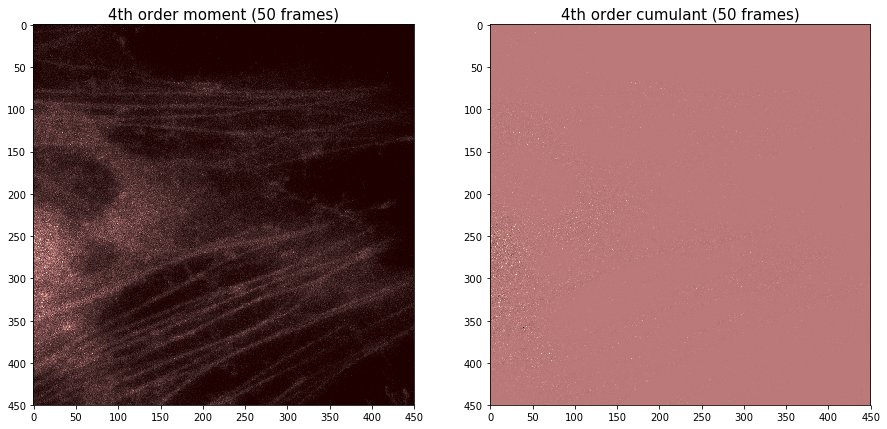

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].set_title('4th order moment (50 frames)', fontsize=15)
axs[0].imshow(m_set[4], cmap='pink')
axs[1].set_title('4th order cumulant (50 frames)', fontsize=15)
axs[1].imshow(k_set[4], cmap='pink')
plt.show()

You can also explore the analysis using the [simulation datasets](https://github.com/xiyuyi-at-LLNL/pysofi/tree/master/sampledata/simulations).

## References
[1] Dertinger, Thomas, Ryan Colyer, Gopal Iyer, Shimon Weiss, and Jörg Enderlein. "Fast, background-free, 3D super-resolution optical fluctuation imaging (SOFI)." Proceedings of the National Academy of Sciences 106, no. 52 (2009): 22287-22292.

[2] Stuart, Alan, and Maurice G. Kendall. The advanced theory of statistics. Griffin, 1963.

[3] Yi, X., Son, S., Ando, R., Miyawaki, A., & Weiss, S. (2019). Moments reconstruction and local dynamic range compression of high order Superresolution Optical Fluctuation Imaging. Biomedical optics express, 10(5), 2430-2445.
